In [1]:
from transformers import AutoTokenizer
from datasets import load_dataset

import sys
sys.path.append("..")
from commands.configs import (
    BYTELEVEL_TOK_FOLDER,
    FINEWEBEDU_REPO_ID,
    HF_USERNAME,
    TOK_REPO_ID,
)

from torch import Tensor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
multilingual = False

from commands.configs import BYTE_LLM_PREDICTION_DATA, COMMONCORPUS_REPO_ID
byte_data = load_dataset(f"{HF_USERNAME}/{COMMONCORPUS_REPO_ID if multilingual else FINEWEBEDU_REPO_ID}", BYTE_LLM_PREDICTION_DATA)['fw57M']
byte_level_tokenizer = AutoTokenizer.from_pretrained(f"{HF_USERNAME}/{TOK_REPO_ID}", subfolder=BYTELEVEL_TOK_FOLDER + ('2' if multilingual else ''))

Resolving data files:   0%|          | 0/21 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/32 [00:00<?, ?it/s]

In [48]:
example = byte_data[13]
print(byte_level_tokenizer.decode(example['input_ids'][32:61]))

filled with pristine material


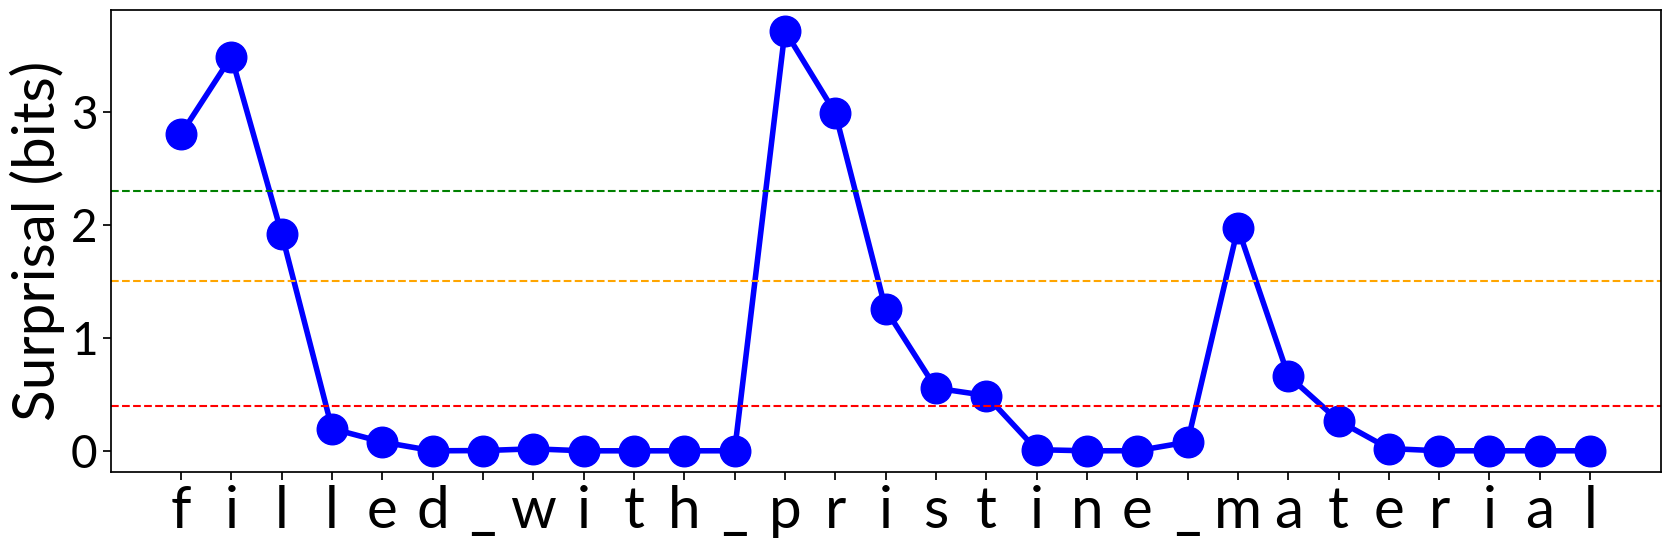

In [53]:
# example = byte_data[8]
# i = 813
# j = 855
# example = byte_data[11]
# i = 1508
# j = 1545
# example = byte_data[12]
# i = 2039
# j = 2065
example = byte_data[13]
i = 32
j = 61
cue = 'Surprisal'

threshold = 0.4
threshold2 = 1.5
threshold3 = 2.3

signal = Tensor(example[cue][i:j])

# change font
plt.rcParams['font.serif'] = 'Lato'
plt.rcParams['font.size'] = 22

# font size
sns.set_context("notebook", font_scale=3)

plt.figure(figsize=(20, 6))
plt.plot(list(range(j-i)), signal, marker='o', linestyle='-', color='b', markersize=22, linewidth=4)
plt.ylabel(cue + ' (bits)', fontsize=42)
decoded = [byte_level_tokenizer.decode(inp) for inp in example['input_ids']]
decoded = ['_' if d == ' ' else d for d in decoded]
plt.xticks(list(range(j-i)), decoded[i:j], ha='center', fontsize=42)
plt.axhline(y=threshold, color='red', linestyle='--')
plt.axhline(y=threshold2, color='orange', linestyle='--')
plt.axhline(y=threshold3, color='green', linestyle='--')
plt.show()

